In [1]:
import os
current_dir = %pwd
project_dir = os.path.dirname(current_dir)
%cd $project_dir

c:\Users\Bryan Fernandez\Desktop\doc-classifier


C:\Users\Bryan Fernandez\AppData\Roaming\Python\Python310\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# LIBRAIRIES ET FONCTIONS


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
from src import create_inference_dataset


def display_layers(model):
    # Get the names of all layers
    layer_names = [layer.name for layer in model.layers]

    # Print the layer names
    for name in layer_names:
        print(name)


def compute_gradcam(img, model, class_idx):
    with tf.GradientTape() as tape:
        conv_outputs, predictions = model(img)
        loss = predictions[:, class_idx]

    # Gradient of the loss with respect to the convolutional layer output
    grads = tape.gradient(loss, conv_outputs)

    # Compute the guided gradients
    guided_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Weight the convolutional layer output with the computed gradients
    conv_outputs = conv_outputs[0]
    guided_grads = guided_grads[None, None, :]
    weighted_conv_outputs = conv_outputs * guided_grads

    # Compute the Grad-CAM heatmap
    cam = np.mean(weighted_conv_outputs, axis=-1)

    # Normalize the heatmap
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()

    return cam


def grad_cam(img_path: str, layer_name: str, saved_model, base_model=None):
    # Load and preprocess the image
    dataset = create_inference_dataset(img_path, batch_size=1)
    # Directly get the image as a numpy array
    preprocessed_img = next(iter(dataset)).numpy()

    # Determine whether to use base_model or saved_model
    model_to_use = base_model if isinstance(
        base_model, tf.keras.Model) else saved_model

    # The target layer (typically the last convolutional layer)
    layer = model_to_use.get_layer(layer_name)

    # Create a Grad-CAM model
    grad_model = tf.keras.models.Model(
        inputs=model_to_use.inputs,
        outputs=[layer.output, model_to_use.output]
    )

    # Predict the class of the input image using saved_model
    preds = saved_model.predict(preprocessed_img)
    class_idx = np.argmax(preds[0])

    # Compute Grad-CAM
    cam = compute_gradcam(preprocessed_img, grad_model, class_idx)

    # Overlay Grad-CAM on the image
    original_img = cv2.imread(img_path)
    heatmap = cv2.resize(cam, (original_img.shape[1], original_img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superimpose the heatmap on the original image
    superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

    # Display the Grad-CAM
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title("Grad-CAM")
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [3]:
# Image path
img_path = r'data\raw\data_04\a4_passport\image_0000013.jpg'

# CNN (from scratch)


In [4]:
# Load model
model_path = r'models\CNN_ckpt_best_loss.keras'
model = tf.keras.models.load_model(model_path)

# Display layers
display_layers(model)

conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
flatten
dense
dropout
dense_1


1/1 [==============================] - 0s 223ms/step


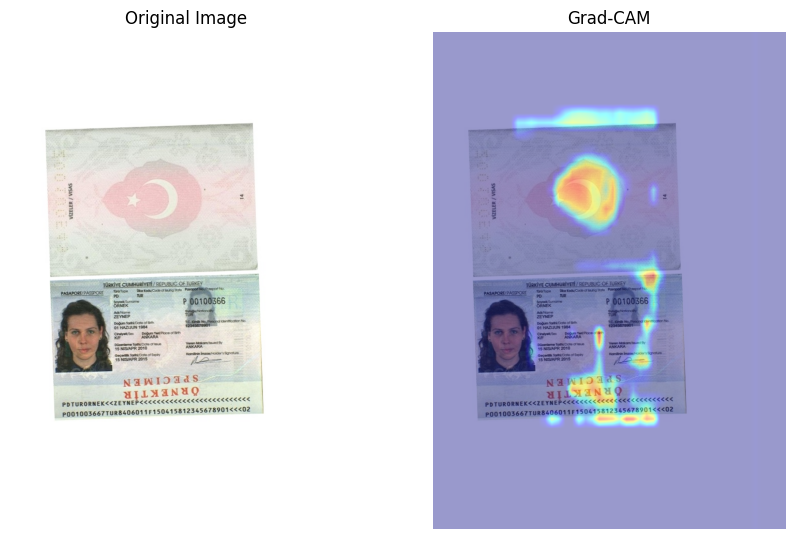

In [5]:
grad_cam(img_path, 'conv2d_2', model)

# SqueezNet


In [6]:
# Load model
model_path = r'models\SqueezeNet_ckpt_best_loss.keras'
model = tf.keras.models.load_model(model_path)

# Display layers
display_layers(model)

input_1
conv2d
max_pooling2d
conv2d_1
conv2d_2
conv2d_3
concatenate
conv2d_4
conv2d_5
conv2d_6
concatenate_1
conv2d_7
conv2d_8
conv2d_9
concatenate_2
max_pooling2d_1
conv2d_10
conv2d_11
conv2d_12
concatenate_3
conv2d_13
conv2d_14
conv2d_15
concatenate_4
conv2d_16
conv2d_17
conv2d_18
concatenate_5
conv2d_19
conv2d_20
conv2d_21
concatenate_6
max_pooling2d_2
conv2d_22
conv2d_23
conv2d_24
concatenate_7
dropout
conv2d_25
global_average_pooling2d
activation


1/1 [==============================] - 0s 264ms/step


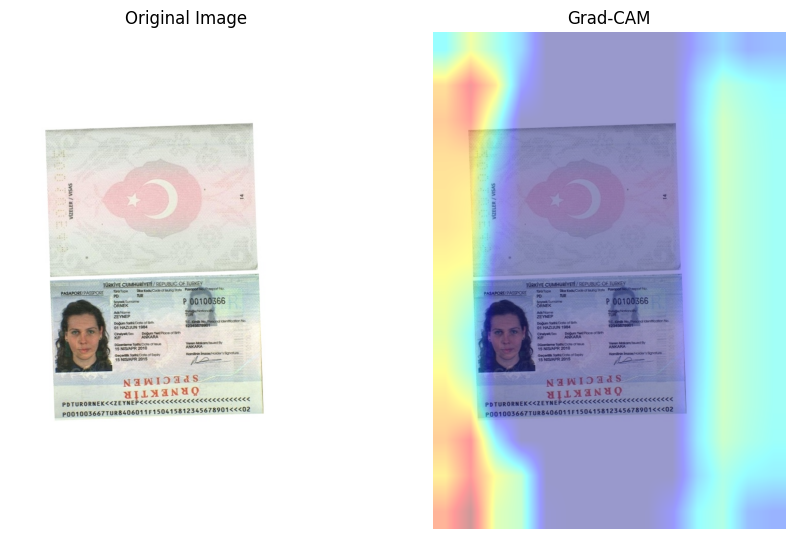

In [7]:
grad_cam(img_path, 'conv2d_25', model)

# MobileNetV2


In [8]:
# Load model
model_path = r'models\MobileNetV2_ckpt_best_loss.keras'
model = tf.keras.models.load_model(model_path)

# Display layers
display_layers(model)

input_1
Conv1
bn_Conv1
Conv1_relu
expanded_conv_depthwise
expanded_conv_depthwise_BN
expanded_conv_depthwise_relu
expanded_conv_project
expanded_conv_project_BN
block_1_expand
block_1_expand_BN
block_1_expand_relu
block_1_pad
block_1_depthwise
block_1_depthwise_BN
block_1_depthwise_relu
block_1_project
block_1_project_BN
block_2_expand
block_2_expand_BN
block_2_expand_relu
block_2_depthwise
block_2_depthwise_BN
block_2_depthwise_relu
block_2_project
block_2_project_BN
block_2_add
block_3_expand
block_3_expand_BN
block_3_expand_relu
block_3_pad
block_3_depthwise
block_3_depthwise_BN
block_3_depthwise_relu
block_3_project
block_3_project_BN
block_4_expand
block_4_expand_BN
block_4_expand_relu
block_4_depthwise
block_4_depthwise_BN
block_4_depthwise_relu
block_4_project
block_4_project_BN
block_4_add
block_5_expand
block_5_expand_BN
block_5_expand_relu
block_5_depthwise
block_5_depthwise_BN
block_5_depthwise_relu
block_5_project
block_5_project_BN
block_5_add
block_6_expand
block_6_expand

1/1 [==============================] - 1s 819ms/step


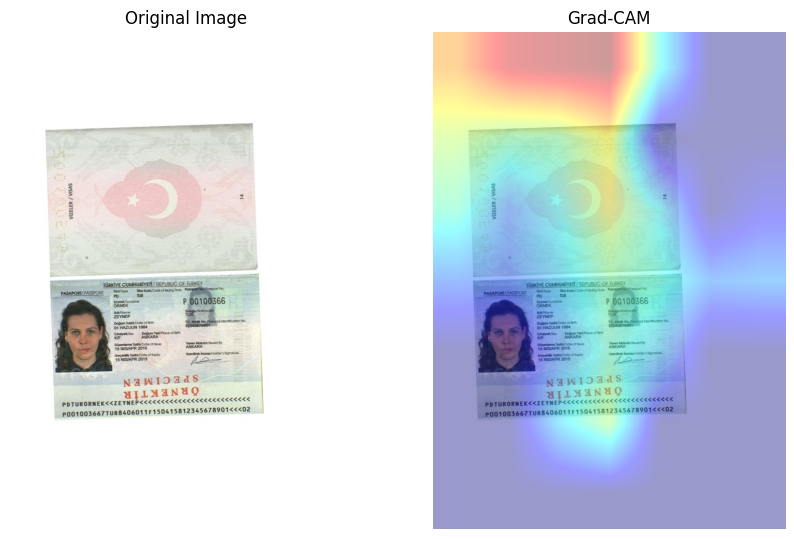

In [9]:
grad_cam(img_path, 'Conv_1_bn', model)

# EfficientNetB1


In [10]:
# Load model
model_path = r'models\EfficientNetB1_ckpt_best_loss.keras'
saved_model = tf.keras.models.load_model(model_path)

# Display layers
display_layers(saved_model)

efficientnetb1
global_average_pooling2d
dense
dense_1


In [11]:
# Get the base model
base_model = saved_model.get_layer("efficientnetb1")

# Get the names of all layers
display_layers(base_model)

input_1
rescaling
normalization
tf.math.truediv
stem_conv_pad
stem_conv
stem_bn
stem_activation
block1a_dwconv
block1a_bn
block1a_activation
block1a_se_squeeze
block1a_se_reshape
block1a_se_reduce
block1a_se_expand
block1a_se_excite
block1a_project_conv
block1a_project_bn
block1b_dwconv
block1b_bn
block1b_activation
block1b_se_squeeze
block1b_se_reshape
block1b_se_reduce
block1b_se_expand
block1b_se_excite
block1b_project_conv
block1b_project_bn
block1b_drop
block1b_add
block2a_expand_conv
block2a_expand_bn
block2a_expand_activation
block2a_dwconv_pad
block2a_dwconv
block2a_bn
block2a_activation
block2a_se_squeeze
block2a_se_reshape
block2a_se_reduce
block2a_se_expand
block2a_se_excite
block2a_project_conv
block2a_project_bn
block2b_expand_conv
block2b_expand_bn
block2b_expand_activation
block2b_dwconv
block2b_bn
block2b_activation
block2b_se_squeeze
block2b_se_reshape
block2b_se_reduce
block2b_se_expand
block2b_se_excite
block2b_project_conv
block2b_project_bn
block2b_drop
block2b_add

1/1 [==============================] - 2s 2s/step


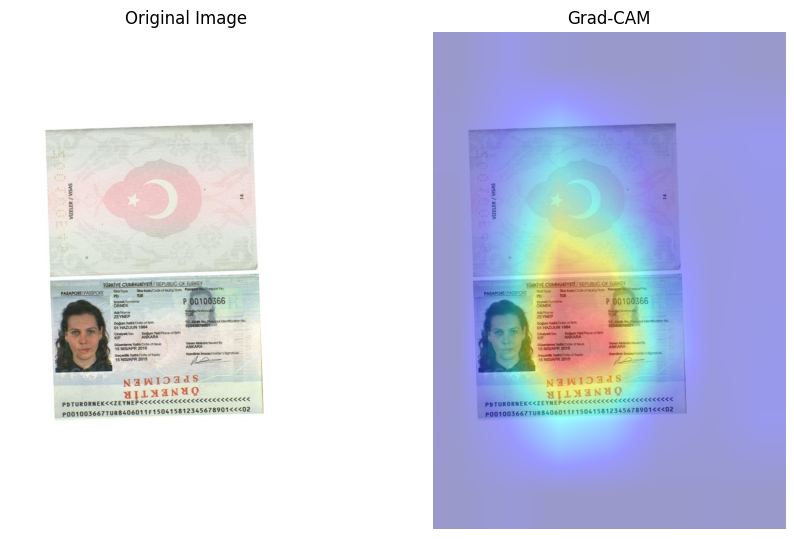

In [12]:
grad_cam(img_path, 'top_conv', saved_model, base_model)

# ResNet50


In [13]:
# Load model
model_path = r'models\ResNet50_ckpt_best_loss.keras'
saved_model = tf.keras.models.load_model(model_path)

# Display layers
display_layers(saved_model)

resnet50
global_average_pooling2d
dense
dense_1


In [14]:
# Get the base model
base_model = saved_model.get_layer("resnet50")

# Get the names of all layers
display_layers(base_model)

input_1
conv1_pad
conv1_conv
conv1_bn
conv1_relu
pool1_pad
pool1_pool
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_0_bn
conv2_block1_3_bn
conv2_block1_add
conv2_block1_out
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_3_bn
conv2_block2_add
conv2_block2_out
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
conv2_block3_3_conv
conv2_block3_3_bn
conv2_block3_add
conv2_block3_out
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_0_bn
conv3_block1_3_bn
conv3_block1_add
conv3_block1_out
conv3_block2_1_conv
conv3_block2_1_bn
conv3_block2_1_relu
conv3_block2_2_conv
conv3_block2_2_bn
conv3_

1/1 [==============================] - 1s 1s/step


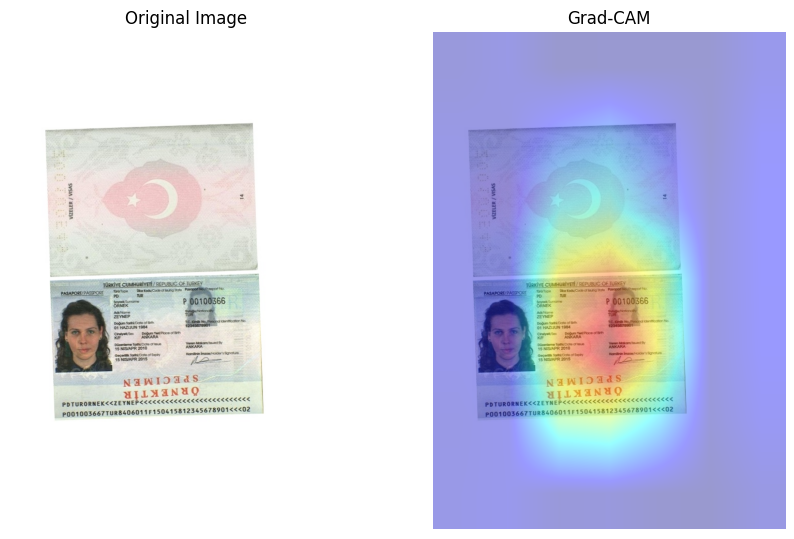

In [15]:
grad_cam(img_path, 'conv5_block3_out', saved_model, base_model)